In [1329]:
from sklearn.preprocessing import LabelEncoder

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import KFold, RepeatedKFold, RepeatedStratifiedKFold, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm

import warnings
warnings.filterwarnings('ignore')

In [1330]:
df=pd.read_csv("breast cancer original.csv")

In [1331]:
df.sample(5)

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
30,1070935,3,1,1,1,1,1,2,1,1,2
246,144888,8,10,10,8,5,10,7,8,1,4
334,785615,8,6,7,3,3,10,3,4,2,4
571,142932,7,6,10,5,3,10,9,10,2,4
462,1276091,6,1,1,3,2,1,1,1,1,2


In [1332]:
df = df.drop(columns=['Sample code number'])
df.tail(5)

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
694,3,1,1,1,3,2,1,1,1,2
695,2,1,1,1,2,1,1,1,1,2
696,5,10,10,3,7,3,8,10,2,4
697,4,8,6,4,3,4,10,6,1,4
698,4,8,8,5,4,5,10,4,1,4


In [1333]:
df.shape

(699, 10)

In [1334]:
df.dtypes

Clump Thickness                 int64
Uniformity of Cell Size         int64
Uniformity of Cell Shape        int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Bland Chromatin                 int64
Normal Nucleoli                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [1335]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump Thickness              699 non-null    int64 
 1   Uniformity of Cell Size      699 non-null    int64 
 2   Uniformity of Cell Shape     699 non-null    int64 
 3   Marginal Adhesion            699 non-null    int64 
 4   Single Epithelial Cell Size  699 non-null    int64 
 5   Bare Nuclei                  699 non-null    object
 6   Bland Chromatin              699 non-null    int64 
 7   Normal Nucleoli              699 non-null    int64 
 8   Mitoses                      699 non-null    int64 
 9   Class                        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [1336]:
df.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [1337]:
df.skew()

Clump Thickness                0.592859
Uniformity of Cell Size        1.233137
Uniformity of Cell Shape       1.161859
Marginal Adhesion              1.524468
Single Epithelial Cell Size    1.712172
Bland Chromatin                1.099969
Normal Nucleoli                1.422261
Mitoses                        3.560658
Class                          0.654564
dtype: float64

# missing value check

In [1338]:
m = {col:df[df[col] == "?"].shape[0] for col in df.columns}
m

{'Clump Thickness': 0,
 'Uniformity of Cell Size': 0,
 'Uniformity of Cell Shape': 0,
 'Marginal Adhesion': 0,
 'Single Epithelial Cell Size': 0,
 'Bare Nuclei': 16,
 'Bland Chromatin': 0,
 'Normal Nucleoli': 0,
 'Mitoses': 0,
 'Class': 0}

In [1339]:
list(df['Bare Nuclei'].mode())

['1']

In [1340]:
df.replace(to_replace ="?", value = 1 , inplace= True)

In [1341]:
m = {col:df[df[col] == "?"].shape[0] for col in df.columns}
m

{'Clump Thickness': 0,
 'Uniformity of Cell Size': 0,
 'Uniformity of Cell Shape': 0,
 'Marginal Adhesion': 0,
 'Single Epithelial Cell Size': 0,
 'Bare Nuclei': 0,
 'Bland Chromatin': 0,
 'Normal Nucleoli': 0,
 'Mitoses': 0,
 'Class': 0}

In [1342]:
df['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

# Data visualization to create histogram

In [1343]:
df.head(2)

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2


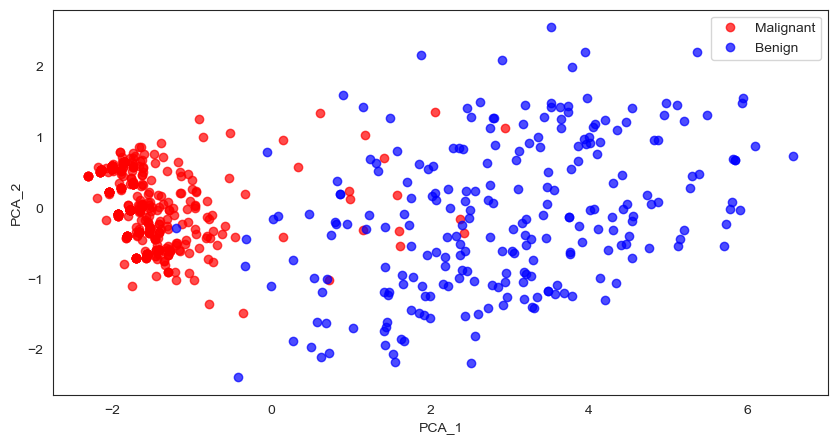

In [1344]:
sns.set_style("white")

plt.rcParams['figure.figsize'] = (10,5) 

array = df.values
X = array[:,0:8]
y = array[:,9]
le=LabelEncoder()
y = le.fit_transform(y)


scaler =StandardScaler()
Xs = scaler.fit_transform(X)


pca = PCA(n_components=8)
fit = pca.fit(Xs)

X_pca = pca.transform(Xs)

PCA_df = pd.DataFrame()

PCA_df['PCA_1'] = X_pca[:,0]
PCA_df['PCA_2'] = X_pca[:,1]

plt.plot(PCA_df['PCA_1'][df.Class == 2],PCA_df['PCA_2'][df.Class == 2],'o', alpha = 0.7, color = 'r')
plt.plot(PCA_df['PCA_1'][df.Class == 4],PCA_df['PCA_2'][df.Class == 4],'o', alpha = 0.7, color = 'b')

plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.legend(['Malignant','Benign'])
plt.show()

In [1345]:
#df.hist(bins=50, figsize=(15, 15))
#plt.show()

In [1346]:
# Scatter matrix to check correlation between two attributes
#sns.pairplot(df, hue='Class')

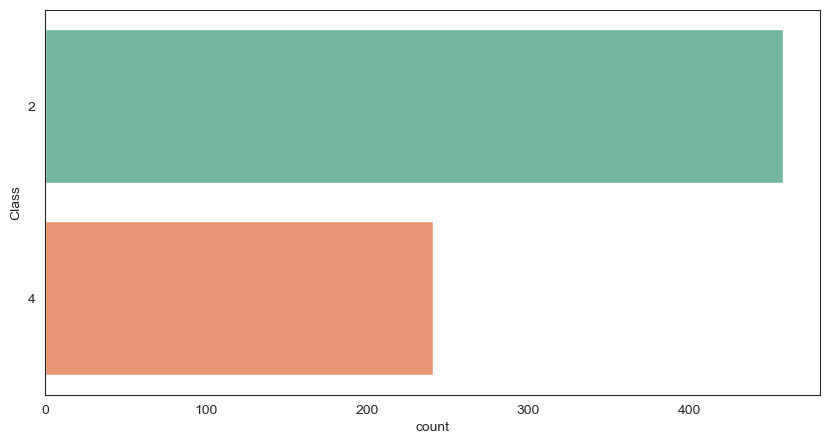

In [1347]:
ax = sns.countplot(y='Class', data=df, palette='Set2')

# Finding correlation

Class
2    458
4    241
dtype: int64


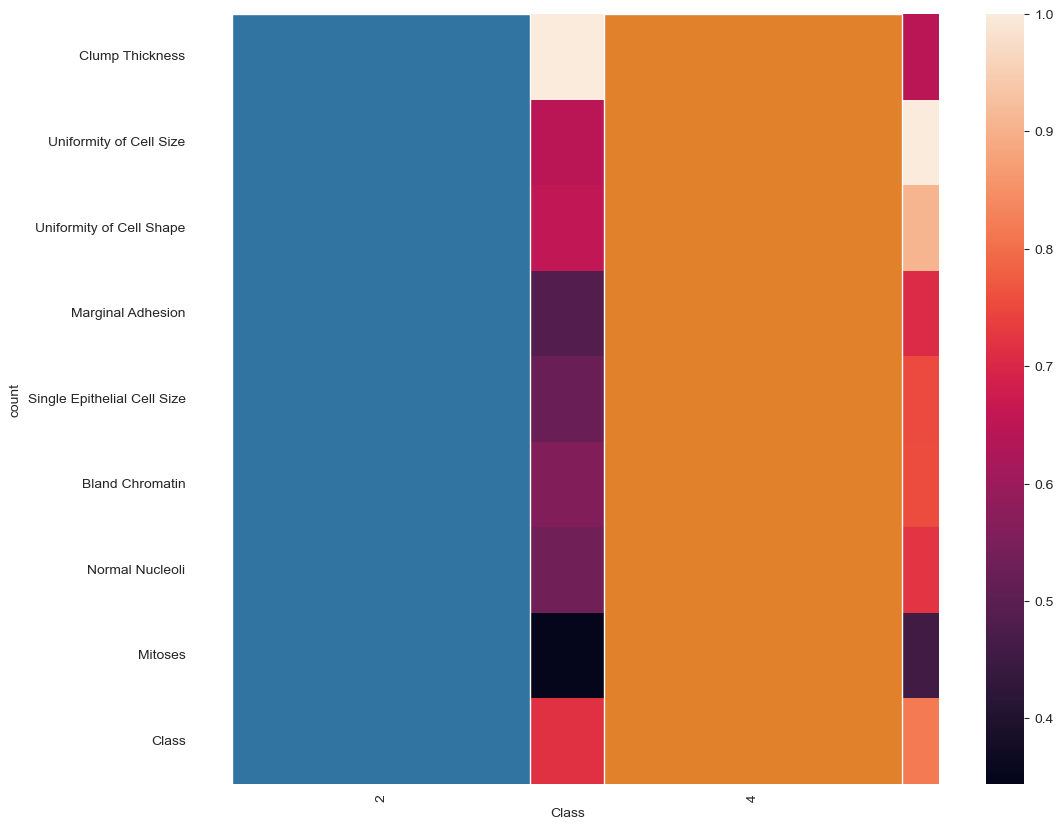

In [1348]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(df.corr(), ax=ax)

print(df.groupby('Class').size())
sns.countplot(df['Class'],label="Count")
plt.show()

In [1349]:
X = df.drop(columns=['Class'])
y = df['Class']

# Convert the M to 1 and B to 0

In [1350]:
label = LabelEncoder()
y = label.fit_transform(y)
y[:20]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0],
      dtype=int64)

# Split the dataset for traning and testing

In [1351]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101, shuffle=True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((629, 9), (70, 9), (629,), (70,))

In [1353]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)

# Model

# Training Performance

# Naive bayes

## Confusion matrix

In [1396]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)
NB_predict = NB_model.predict(X_train)
print(confusion_matrix(y_train, NB_predict))

[[396  21]
 [  6 206]]


## Accuracy

In [1397]:
TP, FP, FN, TN = confusion_matrix(y_train, NB_predict).ravel()
NB_accuracy = (TP + TN) / (TP + FP + FN + TN)
print(NB_accuracy*100,"%")

95.70747217806041 %


## Cross Validation

In [1399]:
kfold = KFold(n_splits=10, shuffle =True, random_state=101)
NB_acc = cross_val_score(NB_model, X_train, y_train, cv=kfold, scoring='accuracy')
print(NB_acc.mean()*100,'%')

95.70916538658473 %


## \# Precision # Recall or Sensitivity # Specificity # F1-Score # False Discovery Rate(FDR) # False Omission Rate(FOR)

In [1042]:
TP, FP, FN, TN = confusion_matrix(y_train, NB_predict).ravel()
precision = TP / (TP + FP)
recall = TP / (TP + FN)
specificity = TN / (TN + FP)
F1_Score = ((2*precision*recall) / (precision + recall))
FDR = FP / (FP + TP)
FOR = FN / (FN + TN)

print("Precision: ", precision)
print("Recall or Sensitivity: ", recall)
print("Specificity: ", specificity)
print("F1-Score: ", F1_Score)
print("False Discovery Rate(FDR): ", FDR)
print("False Omission Rate(FOR): ", FOR)

Precision:  0.9496402877697842
Recall or Sensitivity:  0.9850746268656716
Specificity:  0.9074889867841409
F1-Score:  0.9670329670329669
False Discovery Rate(FDR):  0.050359712230215826
False Omission Rate(FOR):  0.02830188679245283


# Logistic Regression

## confusion_matrix

In [1325]:
LR_model = LogisticRegression()

LR_model.fit(X_train, y_train)
LR_predict = LR_model.predict(X_train)
print(confusion_matrix(y_train, LR_predict))

[[406  11]
 [ 11 201]]


## Accuracy

In [1044]:
TP, FP, FN, TN = confusion_matrix(y_train, LR_predict).ravel()
LR_accuracy = (TP + TN) / (TP + FP + FN + TN)
print(LR_accuracy*100,"%")

96.50238473767885 %


## Cross Validation

In [1400]:
kfold = KFold(n_splits=10, shuffle=True, random_state=101)
LR_acc = cross_val_score(LR_model, X_train, y_train, cv=kfold, scoring='accuracy')
print(LR_acc.mean()*100,'%')

96.50281618023551 %


## \# Precision # Recall or Sensitivity # Specificity # F1-Score # False Discovery Rate(FDR) # False Omission Rate(FOR)

In [1046]:
TP, FP, FN, TN = confusion_matrix(y_train, LR_predict).ravel()
precision = TP / (TP + FP)
recall = TP / (TP + FN)
specificity = TN / (TN + FP)
F1_Score = ((2*precision*recall) / (precision + recall))
FDR = FP / (FP + TP)
FOR = FN / (FN + TN)

print("Precision: ", precision)
print("Recall or Sensitivity: ", recall)
print("Specificity: ", specificity)
print("F1-Score: ", F1_Score)
print("False Discovery Rate(FDR): ", FDR)
print("False Omission Rate(FOR): ", FOR)

Precision:  0.973621103117506
Recall or Sensitivity:  0.973621103117506
Specificity:  0.9481132075471698
F1-Score:  0.973621103117506
False Discovery Rate(FDR):  0.026378896882494004
False Omission Rate(FOR):  0.05188679245283019


# Decision TreeClassifier

## Confusion Matrix

In [1047]:
DT_model = DecisionTreeClassifier(criterion="entropy", max_depth=3)

DT_model.fit(X_train, y_train)
DT_predict = DT_model.predict(X_train)
print(confusion_matrix(y_train, DT_predict))

[[394  23]
 [  1 211]]


## Accuracy

In [1048]:
TP, FP, FN, TN = confusion_matrix(y_train, DT_predict).ravel()
DT_accuracy = (TP + TN) / (TP + FP + FN + TN)
print(DT_accuracy*100,"%")

96.18441971383149 %


## Cross Validation

In [1049]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=101)
DT_acc = cross_val_score(DT_model, X_train, y_train, cv=kfold, scoring='accuracy')
print(DT_acc.mean()*100,'%')

95.23297491039425 %


## \# Precision # Recall or Sensitivity # Specificity # F1-Score # False Discovery Rate(FDR) # False Omission Rate(FOR)

In [1050]:
TP, FP, FN, TN = confusion_matrix(y_train, DT_predict).ravel()
precision = TP / (TP + FP)
recall = TP / (TP + FN)
specificity = TN / (TN + FP)
F1_Score = ((2*precision*recall) / (precision + recall))
FDR = FP / (FP + TP)
FOR = FN / (FN + TN)
    
print("Precision: ", precision)
print("Recall or Sensitivity: ", recall)
print("Specificity: ", specificity)
print("F1-Score: ", F1_Score)
print("False Discovery Rate(FDR): ", FDR)
print("False Omission Rate(FOR): ", FOR)

Precision:  0.9448441247002398
Recall or Sensitivity:  0.9974683544303797
Specificity:  0.9017094017094017
F1-Score:  0.9704433497536946
False Discovery Rate(FDR):  0.05515587529976019
False Omission Rate(FOR):  0.0047169811320754715


# support vector machines

## Confusion Matrix

In [1381]:
SVM_model = SVC()

SVM_model.fit(X_train, y_train)
SVM_predict = SVM_model.predict(X_train)
print(confusion_matrix(y_train, SVM_predict))

[[404  13]
 [  4 208]]


## Accuracy

In [1379]:
TP, FP, FN, TN = confusion_matrix(y_train, SVM_predict).ravel()
SVM_accuracy = (TP + TN) / (TP + FP + FN + TN)
print(SVM_accuracy*100,"%")

97.2972972972973 %


## Cross Validation

In [1053]:
kfold = KFold(n_splits=10, shuffle=True, random_state=101)
SVM_acc = cross_val_score(SVM_model, X_train, y_train, cv=kfold, scoring='accuracy')
print(SVM_acc.mean()*100,'%')

96.50281618023551 %


## \# Precision # Recall or Sensitivity # Specificity # F1-Score # False Discovery Rate(FDR) # False Omission Rate(FOR)

In [1054]:
TP, FP, FN, TN = confusion_matrix(y_train, SVM_predict).ravel()
precision = TP / (TP + FP)
recall = TP / (TP + FN)
specificity = TN / (TN + FP)
F1_Score = ((2*precision*recall) / (precision + recall))
FDR = FP / (FP + TP)
FOR = FN / (FN + TN)
    
print("Precision: ", precision)
print("Recall or Sensitivity: ", recall)
print("Specificity: ", specificity)
print("F1-Score: ", F1_Score)
print("False Discovery Rate(FDR): ", FDR)
print("False Omission Rate(FOR): ", FOR)

Precision:  0.9688249400479616
Recall or Sensitivity:  0.9901960784313726
Specificity:  0.9411764705882353
F1-Score:  0.9793939393939394
False Discovery Rate(FDR):  0.03117505995203837
False Omission Rate(FOR):  0.018867924528301886


## Linear Discriminant Analysis

## Confusion Matrix

In [1326]:
LDA_model = LinearDiscriminantAnalysis()

LDA_model.fit(X_train, y_train)
LDA_predict = LDA_model.predict(X_train)
print(confusion_matrix(y_train, LDA_predict))

[[408   9]
 [ 18 194]]


## Accuracy

In [1327]:
TP, FP, FN, TN = confusion_matrix(y_train, LDA_predict).ravel()
LDA_accuracy = (TP + TN) / (TP + FP + FN + TN)
print(LDA_accuracy*100,"%")

95.70747217806041 %


## Cross Validation

In [1057]:
kfold = KFold(n_splits=10, shuffle=True, random_state=101)
LDA_acc = cross_val_score(LDA_model, X_train, y_train, cv=kfold, scoring='accuracy')
print(LDA_acc.mean()*100,'%')

95.23041474654377 %


## \# Precision # Recall or Sensitivity # Specificity # F1-Score # False Discovery Rate(FDR) # False Omission Rate(FOR)

In [1058]:
TP, FP, FN, TN = confusion_matrix(y_train, LDA_predict).ravel()
precision = TP / (TP + FP)
recall = TP / (TP + FN)
specificity = TN / (TN + FP)
F1_Score = ((2*precision*recall) / (precision + recall))
FDR = FP / (FP + TP)
FOR = FN / (FN + TN)
    
print("Precision: ", precision)
print("Recall or Sensitivity: ", recall)
print("Specificity: ", specificity)
print("F1-Score: ", F1_Score)
print("False Discovery Rate(FDR): ", FDR)
print("False Omission Rate(FOR): ", FOR)

Precision:  0.9784172661870504
Recall or Sensitivity:  0.9577464788732394
Specificity:  0.9556650246305419
F1-Score:  0.9679715302491103
False Discovery Rate(FDR):  0.02158273381294964
False Omission Rate(FOR):  0.08490566037735849


## KNeighborsClassifier

## Confusion Matrix

In [1328]:
KN_model = KNeighborsClassifier()

KN_model.fit(X_train, y_train)
KN_predict = KN_model.predict(X_train)
print(confusion_matrix(y_train, KN_predict))

[[406  11]
 [  6 206]]


## Accuracy

In [1060]:
TP, FP, FN, TN = confusion_matrix(y_train, KN_predict).ravel()
KN_accuracy = (TP + TN) / (TP + FP + FN + TN)
print(KN_accuracy*100,"%")

97.2972972972973 %


## Cross Validation

In [1061]:
kfold = KFold(n_splits=10, shuffle=True, random_state=101)
KN_acc = cross_val_score(KN_model, X_train, y_train, cv=kfold, scoring='accuracy')
print(KN_acc.mean()*100,'%')

97.14029697900666 %


## \# Precision # Recall or Sensitivity # Specificity # F1-Score # False Discovery Rate(FDR) # False Omission Rate(FOR)

In [1062]:
TP, FP, FN, TN = confusion_matrix(y_train, KN_predict).ravel()
precision = TP / (TP + FP)
recall = TP / (TP + FN)
specificity = TN / (TN + FP)
F1_Score = ((2*precision*recall) / (precision + recall))
FDR = FP / (FP + TP)
FOR = FN / (FN + TN)
    
print("Precision: ", precision)
print("Recall or Sensitivity: ", recall)
print("Specificity: ", specificity)
print("F1-Score: ", F1_Score)
print("False Discovery Rate(FDR): ", FDR)
print("False Omission Rate(FOR): ", FOR)

Precision:  0.973621103117506
Recall or Sensitivity:  0.9854368932038835
Specificity:  0.9493087557603687
F1-Score:  0.9794933655006033
False Discovery Rate(FDR):  0.026378896882494004
False Omission Rate(FOR):  0.02830188679245283


# AdaBoost Classifier

## Confussion Matrix

In [1063]:
AB_model = AdaBoostClassifier()

AB_model.fit(X_train, y_train)
AB_predict = AB_model.predict(X_train)
print(confusion_matrix(y_train, AB_predict))

[[410   7]
 [  5 207]]


## Accuracy

In [1064]:
TP, FP, FN, TN = confusion_matrix(y_train, AB_predict).ravel()
AB_accuracy = (TP + TN) / (TP + FP + FN + TN)
print(AB_accuracy*100,"%")

98.09220985691573 %


## Cross Validation

In [1065]:
kfold = KFold(n_splits=10, shuffle=True, random_state=101)
AB_acc = cross_val_score(AB_model, X_train, y_train, cv=kfold, scoring='accuracy')
print(AB_acc.mean()*100,'%')

95.70916538658473 %


## \# Precision # Recall or Sensitivity # Specificity # F1-Score # False Discovery Rate(FDR) # False Omission Rate(FOR)

In [1066]:
TP, FP, FN, TN = confusion_matrix(y_train, AB_predict).ravel()
precision = TP / (TP + FP)
recall = TP / (TP + FN)
specificity = TN / (TN + FP)
F1_Score = ((2*precision*recall) / (precision + recall))
FDR = FP / (FP + TP)
FOR = FN / (FN + TN)
    
print("Precision: ", precision)
print("Recall or Sensitivity: ", recall)
print("Specificity: ", specificity)
print("F1-Score: ", F1_Score)
print("False Discovery Rate(FDR): ", FDR)
print("False Omission Rate(FOR): ", FOR)

Precision:  0.9832134292565947
Recall or Sensitivity:  0.9879518072289156
Specificity:  0.9672897196261683
F1-Score:  0.985576923076923
False Discovery Rate(FDR):  0.016786570743405275
False Omission Rate(FOR):  0.02358490566037736


# Random Forest Classifier

## Confussion Matrix

In [1067]:
RF_model = RandomForestClassifier()

RF_model.fit(X_train, y_train)
RF_predict = RF_model.predict(X_train)
print(confusion_matrix(y_train, RF_predict))

[[417   0]
 [  0 212]]


## Accuracy

In [1068]:
TP, FP, FN, TN = confusion_matrix(y_train, RF_predict).ravel()
RF_accuracy = (TP + TN) / (TP + FP + FN + TN)
print(RF_accuracy*100,"%")

100.0 %


## Cross Validation

In [1401]:
kfold = KFold(n_splits=10, shuffle=True, random_state=101)
RF_acc = cross_val_score(RF_model, X_train, y_train, cv=kfold, scoring='accuracy')
print(RF_acc.mean()*100,'%')

96.18023553507425 %


## \# Precision # Recall or Sensitivity # Specificity # F1-Score # False Discovery Rate(FDR) # False Omission Rate(FOR)

In [1070]:
TP, FP, FN, TN = confusion_matrix(y_train, RF_predict).ravel()
precision = TP / (TP + FP)
recall = TP / (TP + FN)
specificity = TN / (TN + FP)
F1_Score = ((2*precision*recall) / (precision + recall))
FDR = FP / (FP + TP)
FOR = FN / (FN + TN)

print("Precision: ", precision)
print("Recall or Sensitivity: ", recall)
print("Specificity: ", specificity)
print("F1-Score: ", F1_Score)
print("False Discovery Rate(FDR): ", FDR)
print("False Omission Rate(FOR): ", FOR)

Precision:  1.0
Recall or Sensitivity:  1.0
Specificity:  1.0
F1-Score:  1.0
False Discovery Rate(FDR):  0.0
False Omission Rate(FOR):  0.0


# Voting Classifier

## Confussion Matrix

In [1071]:
VC_model = VotingClassifier(estimators=[('ab',AdaBoostClassifier()),('lr',LogisticRegression()),
                                        ('rf',RandomForestClassifier()),('svm',SVC())],voting='hard')

VC_model.fit(X_train, y_train)
VC_predict = VC_model.predict(X_train)
print(confusion_matrix(y_train, VC_predict))

[[411   6]
 [  5 207]]


## Accuracy

In [1072]:
TP, FP, FN, TN = confusion_matrix(y_train, VC_predict).ravel()
VC_accuracy = (TP + TN) / (TP + FP + FN + TN)
print(VC_accuracy*100,"%")

98.25119236883943 %


## Cross Validation

In [1073]:
kfold = KFold(n_splits=10, shuffle=True, random_state=101)
VC_acc = cross_val_score(VC_model, X_train, y_train, cv=kfold, scoring='accuracy')
print(VC_acc.mean()*100,'%')

96.66154633896568 %


## \# Precision # Recall or Sensitivity # Specificity # F1-Score # False Discovery Rate(FDR) # False Omission Rate(FOR)

In [1074]:
TP, FP, FN, TN = confusion_matrix(y_train, VC_predict).ravel()
precision = TP / (TP + FP)
recall = TP / (TP + FN)
specificity = TN / (TN + FP)
F1_Score = ((2*precision*recall) / (precision + recall))
FDR = FP / (FP + TP)
FOR = FN / (FN + TN)
    
print("Precision: ", precision)
print("Recall or Sensitivity: ", recall)
print("Specificity: ", specificity)
print("F1-Score: ", F1_Score)
print("False Discovery Rate(FDR): ", FDR)
print("False Omission Rate(FOR): ", FOR)

Precision:  0.9856115107913669
Recall or Sensitivity:  0.9879807692307693
Specificity:  0.971830985915493
F1-Score:  0.9867947178871549
False Discovery Rate(FDR):  0.014388489208633094
False Omission Rate(FOR):  0.02358490566037736


# Stochastic Gradient Descent

## Confussion Matrix

In [1245]:
SGD_model = SGDClassifier(max_iter=100)

SGD_model.fit(X_train, y_train)
SGD_predict = SGD_model.predict(X_train)
print(confusion_matrix(y_train, SGD_predict))

[[404  13]
 [  6 206]]


## Accuracy

In [1246]:
TP, FP, FN, TN = confusion_matrix(y_train, SGD_predict).ravel()
SGD_accuracy = (TP + TN) / (TP + FP + FN + TN)
print(SGD_accuracy*100,"%")

96.97933227344993 %


## Cross Validation

In [1247]:
kfold = RepeatedStratifiedKFold(n_splits=10, random_state=101)
SGD_acc = cross_val_score(SGD_model, X_train, y_train, cv=kfold, scoring='accuracy')
print(SGD_acc.mean()*100,'%')

95.88172043010753 %


## \# Precision # Recall or Sensitivity # Specificity # F1-Score # False Discovery Rate(FDR) # False Omission Rate(FOR)

In [1229]:
TP, FP, FN, TN = confusion_matrix(y_train, SGD_predict).ravel()
precision = TP / (TP + FP)
recall = TP / (TP + FN)
specificity = TN / (TN + FP)
F1_Score = ((2*precision*recall) / (precision + recall))
FDR = FP / (FP + TP)
FOR = FN / (FN + TN)

print("Precision: ", precision)
print("Recall or Sensitivity: ", recall)
print("Specificity: ", specificity)
print("F1-Score: ", F1_Score)
print("False Discovery Rate(FDR): ", FDR)
print("False Omission Rate(FOR): ", FOR)

Precision:  0.9712230215827338
Recall or Sensitivity:  0.9830097087378641
Specificity:  0.9447004608294931
F1-Score:  0.9770808202653799
False Discovery Rate(FDR):  0.02877697841726619
False Omission Rate(FOR):  0.0330188679245283


# Bagging Classifier

# Confussion Matrix

In [1079]:
BC_model = BaggingClassifier(base_estimator = RandomForestClassifier(), n_estimators = 100) # our contribution is base_estimator

BC_model.fit(X_train, y_train)
BC_predict = BC_model.predict(X_train)
print(confusion_matrix(y_train, BC_predict))

[[410   7]
 [  1 211]]


# Accuracy

In [1080]:
TP, FP, FN, TN = confusion_matrix(y_train, BC_predict).ravel()
BC_accuracy = (TP + TN) / (TP + FP + FN + TN)
print(BC_accuracy*100,"%")

98.72813990461049 %


# Cross Validation

In [1081]:
kfold = KFold(n_splits=10, shuffle=True, random_state=101)
BC_acc = cross_val_score(BC_model, X_train, y_train, cv=kfold, scoring='accuracy')
print(BC_acc.mean()*100,'%')

97.29902713773681 %


# \# Precision # Recall or Sensitivity # Specificity # F1-Score # False Discovery Rate(FDR) # False Omission Rate(FOR)

In [1082]:
TP, FP, FN, TN = confusion_matrix(y_train, BC_predict).ravel()
precision = TP / (TP + FP)
recall = TP / (TP + FN)
specificity = TN / (TN + FP)
F1_Score = ((2*precision*recall) / (precision + recall))
FDR = FP / (FP + TP)
FOR = FN / (FN + TN)

print("Precision: ", precision)
print("Recall or Sensitivity: ", recall)
print("Specificity: ", specificity)
print("F1-Score: ", F1_Score)
print("False Discovery Rate(FDR): ", FDR)
print("False Omission Rate(FOR): ", FOR)

Precision:  0.9832134292565947
Recall or Sensitivity:  0.9975669099756691
Specificity:  0.9678899082568807
F1-Score:  0.9903381642512077
False Discovery Rate(FDR):  0.016786570743405275
False Omission Rate(FOR):  0.0047169811320754715


# Gradient Boosting Classifier

# Confussion Matrix

In [1083]:
GB_model = GradientBoostingClassifier()

GB_model.fit(X_train, y_train)
GB_predict = GB_model.predict(X_train)
print(confusion_matrix(y_train, GB_predict))

[[417   0]
 [  0 212]]


# Accuracy

In [1084]:
TP, FP, FN, TN = confusion_matrix(y_train, GB_predict).ravel()
GB_accuracy = (TP + TN) / (TP + FP + FN + TN)
print(GB_accuracy*100,"%")

100.0 %


# Cross Validation

In [1085]:
kfold = KFold(n_splits=10, shuffle=True, random_state=101)
GB_acc = cross_val_score(GB_model, X_train, y_train, cv=kfold, scoring='accuracy')
print(GB_acc.mean()*100,'%')

96.18791602662571 %


# \# Precision # Recall or Sensitivity # Specificity # F1-Score # False Discovery Rate(FDR) # False Omission Rate(FOR)

In [1086]:
TP, FP, FN, TN = confusion_matrix(y_train, GB_predict).ravel()
precision = TP / (TP + FP)
recall = TP / (TP + FN)
specificity = TN / (TN + FP)
F1_Score = ((2*precision*recall) / (precision + recall))
FDR = FP / (FP + TP)
FOR = FN / (FN + TN)
    
print("Precision: ", precision)
print("Recall or Sensitivity: ", recall)
print("Specificity: ", specificity)
print("F1-Score: ", F1_Score)
print("False Discovery Rate(FDR): ", FDR)
print("False Omission Rate(FOR): ", FOR)

Precision:  1.0
Recall or Sensitivity:  1.0
Specificity:  1.0
F1-Score:  1.0
False Discovery Rate(FDR):  0.0
False Omission Rate(FOR):  0.0


# Testing Performance

# Naive bayes

# confusion_matrix

In [1354]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)
NB_predict = NB_model.predict(X_test)
print(confusion_matrix(y_test, NB_predict))

[[40  1]
 [ 0 29]]


# Accuracy

In [1355]:
TP, FP, FN, TN = confusion_matrix(y_test, NB_predict).ravel()
NB_accuracy = (TP + TN) / (TP + FP + FN + TN)
print(NB_accuracy*100,"%")


98.57142857142858 %


# Cross Validation

In [1356]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=101)
NB_acc = cross_val_score(NB_model, X_test, y_test, cv=kfold, scoring='accuracy')
print(NB_acc.mean()*100,'%')

95.71428571428571 %


## \# Precision # Recall or Sensitivity # Specificity # F1-Score # False Discovery Rate(FDR) # False Omission Rate(FOR)

In [1090]:
TP, FP, FN, TN = confusion_matrix(y_test, NB_predict).ravel()
precision = TP / (TP + FP)
recall = TP / (TP + FN)
specificity = TN / (TN + FP)
F1_Score = ((2*precision*recall) / (precision + recall))
FDR = FP / (FP + TP)
FOR = FN / (FN + TN)

print("Precision: ", precision)
print("Recall or Sensitivity: ", recall)
print("Specificity: ", specificity)
print("F1-Score: ", F1_Score)
print("False Discovery Rate(FDR): ", FDR)
print("False Omission Rate(FOR): ", FOR)

Precision:  0.975609756097561
Recall or Sensitivity:  1.0
Specificity:  0.9666666666666667
F1-Score:  0.9876543209876543
False Discovery Rate(FDR):  0.024390243902439025
False Omission Rate(FOR):  0.0


# Logistic Regression

## confusion_matrix

In [1091]:
LR_model = LogisticRegression()

LR_model.fit(X_train, y_train)
LR_predict = LR_model.predict(X_test)
print(confusion_matrix(y_test, LR_predict))

[[41  0]
 [ 0 29]]


## Accuracy

In [1092]:
TP, FP, FN, TN = confusion_matrix(y_test, LR_predict).ravel()
LR_accuracy = (TP + TN) / (TP + FP + FN + TN)
print(LR_accuracy*100,"%")

100.0 %


## Cross Validation

In [1093]:
kfold = KFold(n_splits=8, shuffle=True, random_state=101)
LR_acc = cross_val_score(LR_model, X_test, y_test, cv=kfold, scoring='accuracy')
print(LR_acc.mean()*100,'%')

98.61111111111111 %


## \# Precision # Recall or Sensitivity # Specificity # F1-Score # False Discovery Rate(FDR) # False Omission Rate(FOR)

In [1094]:
TP, FP, FN, TN = confusion_matrix(y_test, LR_predict).ravel()
precision = TP / (TP + FP)
recall = TP / (TP + FN)
specificity = TN / (TN + FP)
F1_Score = ((2*precision*recall) / (precision + recall))
FDR = FP / (FP + TP)
FOR = FN / (FN + TN)

print("Precision: ", precision)
print("Recall or Sensitivity: ", recall)
print("Specificity: ", specificity)
print("F1-Score: ", F1_Score)
print("False Discovery Rate(FDR): ", FDR)
print("False Omission Rate(FOR): ", FOR)

Precision:  1.0
Recall or Sensitivity:  1.0
Specificity:  1.0
F1-Score:  1.0
False Discovery Rate(FDR):  0.0
False Omission Rate(FOR):  0.0


# Decision TreeClassifier

## Confusion Matrix

In [1095]:
DT_model = DecisionTreeClassifier(criterion="entropy", max_depth=3)

DT_model.fit(X_train, y_train)
DT_predict = DT_model.predict(X_test)
print(confusion_matrix(y_test, DT_predict))

[[40  1]
 [ 1 28]]


## Accuracy

In [1096]:
TP, FP, FN, TN = confusion_matrix(y_test, DT_predict).ravel()
DT_accuracy = (TP + TN) / (TP + FP + FN + TN)
print(DT_accuracy*100,"%")

97.14285714285714 %


## Cross Validation

In [1097]:
kfold = KFold(n_splits=10, shuffle=True, random_state=101)
cvv = RepeatedStratifiedKFold(n_splits=10,  random_state=101)
DT_acc = cross_val_score(DT_model, X_test, y_test, cv=kfold, scoring='accuracy')
print(DT_acc.mean()*100,'%')

95.71428571428572 %


## \# Precision # Recall or Sensitivity # Specificity # F1-Score # False Discovery Rate(FDR) # False Omission Rate(FOR)

In [1098]:
TP, FP, FN, TN = confusion_matrix(y_test, DT_predict).ravel()
precision = TP / (TP + FP)
recall = TP / (TP + FN)
specificity = TN / (TN + FP)
F1_Score = ((2*precision*recall) / (precision + recall))
FDR = FP / (FP + TP)
FOR = FN / (FN + TN)
    
print("Precision: ", precision)
print("Recall or Sensitivity: ", recall)
print("Specificity: ", specificity)
print("F1-Score: ", F1_Score)
print("False Discovery Rate(FDR): ", FDR)
print("False Omission Rate(FOR): ", FOR)

Precision:  0.975609756097561
Recall or Sensitivity:  0.975609756097561
Specificity:  0.9655172413793104
F1-Score:  0.975609756097561
False Discovery Rate(FDR):  0.024390243902439025
False Omission Rate(FOR):  0.034482758620689655


# support vector machines

## Confusion Matrix

In [1382]:
SVM_model = SVC()

SVM_model.fit(X_train, y_train)
SVM_predict = SVM_model.predict(X_test)
print(confusion_matrix(y_test, SVM_predict))

[[41  0]
 [ 0 29]]


## Accuracy

In [1383]:
TP, FP, FN, TN = confusion_matrix(y_test, SVM_predict).ravel()
SVM_accuracy = (TP + TN) / (TP + FP + FN + TN)
print(SVM_accuracy*100,"%")

100.0 %


## Cross Validation

In [1384]:
kfold = RepeatedKFold(n_splits=7, random_state=101)
SVM_acc = cross_val_score(SVM_model, X_test, y_test, cv=kfold, scoring='accuracy')
print(SVM_acc.mean()*100,'%')

98.00000000000001 %


## \# Precision # Recall or Sensitivity # Specificity # F1-Score # False Discovery Rate(FDR) # False Omission Rate(FOR)

In [1102]:
TP, FP, FN, TN = confusion_matrix(y_test, SVM_predict).ravel()
precision = TP / (TP + FP)
recall = TP / (TP + FN)
specificity = TN / (TN + FP)
F1_Score = ((2*precision*recall) / (precision + recall))
FDR = FP / (FP + TP)
FOR = FN / (FN + TN)
    
print("Precision: ", precision)
print("Recall or Sensitivity: ", recall)
print("Specificity: ", specificity)
print("F1-Score: ", F1_Score)
print("False Discovery Rate(FDR): ", FDR)
print("False Omission Rate(FOR): ", FOR)

Precision:  1.0
Recall or Sensitivity:  1.0
Specificity:  1.0
F1-Score:  1.0
False Discovery Rate(FDR):  0.0
False Omission Rate(FOR):  0.0


# Linear Discriminant Analysis

## Confusion Matrix

In [1103]:
LDA_model = LinearDiscriminantAnalysis()

LDA_model.fit(X_train, y_train)
LDA_predict = LDA_model.predict(X_test)
print(confusion_matrix(y_test, LDA_predict))


[[41  0]
 [ 1 28]]


## Accuracy

In [1104]:
TP, FP, FN, TN = confusion_matrix(y_test, LDA_predict).ravel()
LDA_accuracy = (TP + TN) / (TP + FP + FN + TN)
print(LDA_accuracy*100,"%")

98.57142857142858 %


## Cross Validation

In [1105]:
kfold = RepeatedKFold(n_splits=8,  random_state=101)
LDA_acc = cross_val_score(LDA_model, X_test, y_test, cv=kfold, scoring='accuracy')
print(LDA_acc.mean()*100,'%')

98.73263888888889 %


## \# Precision # Recall or Sensitivity # Specificity # F1-Score # False Discovery Rate(FDR) # False Omission Rate(FOR)

In [1106]:
TP, FP, FN, TN = confusion_matrix(y_test, LDA_predict).ravel()
precision = TP / (TP + FP)
recall = TP / (TP + FN)
specificity = TN / (TN + FP)
F1_Score = ((2*precision*recall) / (precision + recall))
FDR = FP / (FP + TP)
FOR = FN / (FN + TN)
    
print("Precision: ", precision)
print("Recall or Sensitivity: ", recall)
print("Specificity: ", specificity)
print("F1-Score: ", F1_Score)
print("False Discovery Rate(FDR): ", FDR)
print("False Omission Rate(FOR): ", FOR)

Precision:  1.0
Recall or Sensitivity:  0.9761904761904762
Specificity:  1.0
F1-Score:  0.9879518072289156
False Discovery Rate(FDR):  0.0
False Omission Rate(FOR):  0.034482758620689655


# KNeighborsClassifier

## Confusion Matrix

In [1107]:
KN_model = KNeighborsClassifier()

KN_model.fit(X_train, y_train)
KN_predict = KN_model.predict(X_test)
print(confusion_matrix(y_test, KN_predict))

[[41  0]
 [ 2 27]]


## Accuracy

In [1108]:
TP, FP, FN, TN = confusion_matrix(y_test, KN_predict).ravel()
KN_accuracy = (TP + TN) / (TP + FP + FN + TN)
print(KN_accuracy*100,"%")

97.14285714285714 %


## Cross Validation

In [1109]:
kfold = RepeatedKFold(n_splits=8,  random_state=101)
KN_acc = cross_val_score(KN_model, X_test, y_test, cv=kfold, scoring='accuracy')
print(KN_acc.mean()*100,'%')

98.87152777777779 %


## \# Precision # Recall or Sensitivity # Specificity # F1-Score # False Discovery Rate(FDR) # False Omission Rate(FOR)

In [1110]:
TP, FP, FN, TN = confusion_matrix(y_test, KN_predict).ravel()
precision = TP / (TP + FP)
recall = TP / (TP + FN)
specificity = TN / (TN + FP)
F1_Score = ((2*precision*recall) / (precision + recall))
FDR = FP / (FP + TP)
FOR = FN / (FN + TN)
    
print("Precision: ", precision)
print("Recall or Sensitivity: ", recall)
print("Specificity: ", specificity)
print("F1-Score: ", F1_Score)
print("False Discovery Rate(FDR): ", FDR)
print("False Omission Rate(FOR): ", FOR)

Precision:  1.0
Recall or Sensitivity:  0.9534883720930233
Specificity:  1.0
F1-Score:  0.9761904761904763
False Discovery Rate(FDR):  0.0
False Omission Rate(FOR):  0.06896551724137931


# AdaBoost Classifier

## Confussion Matrix

In [1111]:
AB_model = AdaBoostClassifier(base_estimator=RandomForestClassifier(), learning_rate=0.01)

AB_model.fit(X_train, y_train)
AB_predict = AB_model.predict(X_test)
print(confusion_matrix(y_test, AB_predict))


[[41  0]
 [ 0 29]]


## Accuracy

In [1112]:
TP, FP, FN, TN = confusion_matrix(y_test, AB_predict).ravel()
AB_accuracy = (TP + TN) / (TP + FP + FN + TN)
print(AB_accuracy*100,"%")

100.0 %


In [1113]:
kfold = KFold(n_splits=10, shuffle=True, random_state=101)
AB_acc = cross_val_score(AB_model, X_test, y_test, cv=kfold, scoring='accuracy')
print(AB_acc.mean()*100,'%')

98.57142857142858 %


## \# Precision # Recall or Sensitivity # Specificity # F1-Score # False Discovery Rate(FDR) # False Omission Rate(FOR)

In [1114]:
TP, FP, FN, TN = confusion_matrix(y_test, AB_predict).ravel()
precision = TP / (TP + FP)
recall = TP / (TP + FN)
specificity = TN / (TN + FP)
F1_Score = ((2*precision*recall) / (precision + recall))
FDR = FP / (FP + TP)
FOR = FN / (FN + TN)
    
print("Precision: ", precision)
print("Recall or Sensitivity: ", recall)
print("Specificity: ", specificity)
print("F1-Score: ", F1_Score)
print("False Discovery Rate(FDR): ", FDR)
print("False Omission Rate(FOR): ", FOR)

Precision:  1.0
Recall or Sensitivity:  1.0
Specificity:  1.0
F1-Score:  1.0
False Discovery Rate(FDR):  0.0
False Omission Rate(FOR):  0.0


# Random Forest Classifier

## Confussion Matrix

In [1115]:
RF_model = RandomForestClassifier()

RF_model.fit(X_train, y_train)
RF_predict = RF_model.predict(X_test)
print(confusion_matrix(y_test, RF_predict))


[[41  0]
 [ 0 29]]


## Accuracy

In [1116]:
TP, FP, FN, TN = confusion_matrix(y_test, RF_predict).ravel()
RF_accuracy = (TP + TN) / (TP + FP + FN + TN)
print(RF_accuracy*100,"%")

100.0 %


## Cross Validation

In [1117]:
kfold = RepeatedKFold(n_splits=8, random_state=101)
RF_acc = cross_val_score(RF_model, X_test, y_test, cv=kfold, scoring='accuracy')
print(RF_acc.mean()*100,'%')

98.71527777777779 %


## \# Precision # Recall or Sensitivity # Specificity # F1-Score # False Discovery Rate(FDR) # False Omission Rate(FOR)

In [1118]:
TP, FP, FN, TN = confusion_matrix(y_test, RF_predict).ravel()
precision = TP / (TP + FP)
recall = TP / (TP + FN)
specificity = TN / (TN + FP)
F1_Score = ((2*precision*recall) / (precision + recall))
FDR = FP / (FP + TP)
FOR = FN / (FN + TN)

print("Precision: ", precision)
print("Recall or Sensitivity: ", recall)
print("Specificity: ", specificity)
print("F1-Score: ", F1_Score)
print("False Discovery Rate(FDR): ", FDR)
print("False Omission Rate(FOR): ", FOR)

Precision:  1.0
Recall or Sensitivity:  1.0
Specificity:  1.0
F1-Score:  1.0
False Discovery Rate(FDR):  0.0
False Omission Rate(FOR):  0.0


# Voting Classifier

## Confussion Matrix

In [1119]:
VC_model = VotingClassifier(estimators=[('ab',AdaBoostClassifier()),('lr',LogisticRegression()),
                                        ('rf',RandomForestClassifier()),('svm',SVC())],voting='hard')

VC_model.fit(X_train, y_train)
VC_predict = VC_model.predict(X_test)
print(confusion_matrix(y_test, VC_predict))

[[41  0]
 [ 0 29]]


## Accuracy

In [1120]:
TP, FP, FN, TN = confusion_matrix(y_test, VC_predict).ravel()
VC_accuracy = (TP + TN) / (TP + FP + FN + TN)
print(VC_accuracy*100,"%")

100.0 %


## Cross Validation

In [1121]:
kfold = RepeatedKFold(n_splits=8, random_state=101)
VC_acc = cross_val_score(VC_model, X_test, y_test, cv=kfold, scoring='accuracy')
print(VC_acc.mean()*100,'%')

98.73263888888889 %


## \# Precision # Recall or Sensitivity # Specificity # F1-Score # False Discovery Rate(FDR) # False Omission Rate(FOR)

In [1122]:
TP, FP, FN, TN = confusion_matrix(y_test, VC_predict).ravel()
precision = TP / (TP + FP)
recall = TP / (TP + FN)
specificity = TN / (TN + FP)
F1_Score = ((2*precision*recall) / (precision + recall))
FDR = FP / (FP + TP)
FOR = FN / (FN + TN)
    
print("Precision: ", precision)
print("Recall or Sensitivity: ", recall)
print("Specificity: ", specificity)
print("F1-Score: ", F1_Score)
print("False Discovery Rate(FDR): ", FDR)
print("False Omission Rate(FOR): ", FOR)


Precision:  1.0
Recall or Sensitivity:  1.0
Specificity:  1.0
F1-Score:  1.0
False Discovery Rate(FDR):  0.0
False Omission Rate(FOR):  0.0


# Stochastic Gradient Descent

## Confussion Matrix

In [1123]:
SGD_model = SGDClassifier( max_iter=100)

SGD_model.fit(X_train, y_train)
SGD_predict = SGD_model.predict(X_test)
print(confusion_matrix(y_test, SGD_predict))

[[41  0]
 [ 1 28]]


## Accuracy

In [1124]:
TP, FP, FN, TN = confusion_matrix(y_test, SGD_predict).ravel()
SGD_accuracy = (TP + TN) / (TP + FP + FN + TN)
print(SGD_accuracy*100,"%")


98.57142857142858 %


## Cross Validation

In [1135]:
kfold = KFold(n_splits=10, shuffle=True, random_state=101)
cvv = RepeatedKFold(n_splits=10, random_state=101)
SGD_acc = cross_val_score(SGD_model, X_test, y_test, cv=kfold, scoring='accuracy')
print(SGD_acc.mean()*100,'%')

98.57142857142858 %


# 100.0 %

## \# Precision # Recall or Sensitivity # Specificity # F1-Score # False Discovery Rate(FDR) # False Omission Rate(FOR)

In [1126]:
TP, FP, FN, TN = confusion_matrix(y_test, SGD_predict).ravel()
precision = TP / (TP + FP)
recall = TP / (TP + FN)
specificity = TN / (TN + FP)
F1_Score = ((2*precision*recall) / (precision + recall))
FDR = FP / (FP + TP)
FOR = FN / (FN + TN)
    
print("Precision: ", precision)
print("Recall or Sensitivity: ", recall)
print("Specificity: ", specificity)
print("F1-Score: ", F1_Score)
print("False Discovery Rate(FDR): ", FDR)
print("False Omission Rate(FOR): ", FOR)

Precision:  1.0
Recall or Sensitivity:  0.9761904761904762
Specificity:  1.0
F1-Score:  0.9879518072289156
False Discovery Rate(FDR):  0.0
False Omission Rate(FOR):  0.034482758620689655


# Bagging Classifier

## Confussion Matrix

In [1127]:
BC_model = BaggingClassifier(base_estimator = LogisticRegression(), n_estimators = 500) #our contribution

BC_model.fit(X_train, y_train)
BC_predict = BC_model.predict(X_test)
print(confusion_matrix(y_test, BC_predict))

[[41  0]
 [ 0 29]]


## Accuracy

In [1128]:
TP, FP, FN, TN = confusion_matrix(y_test, BC_predict).ravel()
BC_accuracy = (TP + TN) / (TP + FP + FN + TN)
print(BC_accuracy*100,"%")

100.0 %


## Cross Validation

In [1129]:
kfold = KFold(n_splits=8, shuffle=True, random_state=101)
BC_acc = cross_val_score(BC_model, X_test, y_test, cv=kfold, scoring='accuracy')
print(BC_acc.mean()*100,'%')

98.61111111111111 %


## \# Precision # Recall or Sensitivity # Specificity # F1-Score # False Discovery Rate(FDR) # False Omission Rate(FOR)

In [1130]:
TP, FP, FN, TN = confusion_matrix(y_test, BC_predict).ravel()
precision = TP / (TP + FP)
recall = TP / (TP + FN)
specificity = TN / (TN + FP)
F1_Score = ((2*precision*recall) / (precision + recall))
FDR = FP / (FP + TP)
FOR = FN / (FN + TN)
    
print("Precision: ", precision)
print("Recall or Sensitivity: ", recall)
print("Specificity: ", specificity)
print("F1-Score: ", F1_Score)
print("False Discovery Rate(FDR): ", FDR)
print("False Omission Rate(FOR): ", FOR)

Precision:  1.0
Recall or Sensitivity:  1.0
Specificity:  1.0
F1-Score:  1.0
False Discovery Rate(FDR):  0.0
False Omission Rate(FOR):  0.0


## Gradient Boosting Classifier

## Confussion Matrix

In [1131]:
GB_model = GradientBoostingClassifier()

GB_model.fit(X_train, y_train)
GB_predict = GB_model.predict(X_test)
print(confusion_matrix(y_test, GB_predict))

[[40  1]
 [ 1 28]]


## Accuracy

In [1132]:
TP, FP, FN, TN = confusion_matrix(y_test, GB_predict).ravel()
GB_accuracy = (TP + TN) / (TP + FP + FN + TN)
print(GB_accuracy*100,"%")

97.14285714285714 %


## Cross Validation

In [1133]:
kfold = KFold(n_splits=10, shuffle=True, random_state=101)
GB_acc = cross_val_score(GB_model, X_test, y_test, cv=kfold, scoring='accuracy')
print(GB_acc.mean()*100,'%')

98.57142857142858 %


## \# Precision # Recall or Sensitivity # Specificity # F1-Score # False Discovery Rate(FDR) # False Omission Rate(FOR)

In [1134]:
TP, FP, FN, TN = confusion_matrix(y_test, GB_predict).ravel()
precision = TP / (TP + FP)
recall = TP / (TP + FN)
specificity = TN / (TN + FP)
F1_Score = ((2*precision*recall) / (precision + recall))
FDR = FP / (FP + TP)
FOR = FN / (FN + TN)
    
print("Precision: ", precision)
print("Recall or Sensitivity: ", recall)
print("Specificity: ", specificity)
print("F1-Score: ", F1_Score)
print("False Discovery Rate(FDR): ", FDR)
print("False Omission Rate(FOR): ", FOR)

Precision:  0.975609756097561
Recall or Sensitivity:  0.975609756097561
Specificity:  0.9655172413793104
F1-Score:  0.975609756097561
False Discovery Rate(FDR):  0.024390243902439025
False Omission Rate(FOR):  0.034482758620689655
